In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
funnel = pd.read_excel(r"C:\Users\Narendra Singh\Downloads\Fittlyf Assignment\Worker_funnel.xlsx")

In [3]:
funnel.columns

Index(['Date', 'Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity'],
      dtype='object')

In [4]:
funnel.isnull().sum()

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64

In [5]:
funnel['Actual Productivity'].fillna(funnel['Actual Productivity'].mean(), inplace=True)


In [6]:
funnel.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [7]:
duplicate_rows = funnel[funnel.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 36


In [8]:
funnel.drop_duplicates(inplace=True)


# To Handle missing and duplicate values, find missing values in actual productivity, specifically I found 30 missing values and handled it with mean().

In [9]:
funnel['Target Achieved'] = np.where(funnel['Actual Productivity'] > funnel['Targeted Productivity'], 'Yes', 'No')

grouped_data = funnel.groupby(['Quarter', 'Department'])

target_achieved_count = grouped_data['Target Achieved'].apply(lambda x: (x == 'Yes').sum())

target_not_achieved_count = grouped_data['Target Achieved'].apply(lambda x: (x == 'No').sum())

average_targeted_productivity = grouped_data['Targeted Productivity'].mean()

total_overtime = grouped_data['Overtime'].sum()

total_workers = grouped_data['No. of Workers'].sum()

average_actual_productivity = grouped_data['Actual Productivity'].mean()

print(target_achieved_count)


Quarter  Department
Q1       Finishing      91
         Sewing        163
Q2       Finishing      91
         Sewing        142
Q3       Finishing      37
         Sewing         97
Q4       Finishing      59
         Sewing        111
Q5       Finishing      15
         Sewing         19
Name: Target Achieved, dtype: int64


In [10]:
print(target_not_achieved_count)


Quarter  Department
Q1       Finishing     55
         Sewing        37
Q2       Finishing     55
         Sewing        36
Q3       Finishing     44
         Sewing        28
Q4       Finishing     47
         Sewing        26
Q5       Finishing      4
         Sewing         4
Name: Target Achieved, dtype: int64


In [11]:

print(average_targeted_productivity)


Quarter  Department
Q1       Finishing     0.748288
         Sewing        0.738600
Q2       Finishing     0.738356
         Sewing        0.725843
Q3       Finishing     0.741358
         Sewing        0.705600
Q4       Finishing     0.721226
         Sewing        0.707299
Q5       Finishing     0.715789
         Sewing        0.713043
Name: Targeted Productivity, dtype: float64


In [12]:
print(total_overtime)


Quarter  Department
Q1       Finishing      296340
         Sewing        1221060
Q2       Finishing      217320
         Sewing        1159050
Q3       Finishing      143220
         Sewing         849030
Q4       Finishing      269160
         Sewing         897170
Q5       Finishing       19440
         Sewing         142080
Name: Overtime, dtype: int64


In [13]:
print(total_workers)


Quarter  Department
Q1       Finishing      1541.0
         Sewing        10397.5
Q2       Finishing      1421.0
         Sewing         9323.5
Q3       Finishing       818.0
         Sewing         6631.0
Q4       Finishing      1161.0
         Sewing         7170.5
Q5       Finishing       162.0
         Sewing         1211.0
Name: No. of Workers, dtype: float64


In [14]:
print(average_actual_productivity)

Quarter  Department
Q1       Finishing     0.759563
         Sewing        0.743991
Q2       Finishing     0.761238
         Sewing        0.725134
Q3       Finishing     0.735793
         Sewing        0.684893
Q4       Finishing     0.715640
         Sewing        0.699697
Q5       Finishing     0.880154
         Sewing        0.758615
Name: Actual Productivity, dtype: float64


In [15]:
summary = funnel.groupby(['Quarter', 'Department']).agg(
    Target_Achieved_Count=('Target Achieved', lambda x: (x == 'Yes').sum()),
    Target_Not_Achieved_Count=('Target Achieved', lambda x: (x == 'No').sum()),
    Average_Targeted_Productivity=('Targeted Productivity', 'mean'),
    Total_Overtime=('Overtime', 'sum'),
    Total_Number_of_Workers=('No. of Workers', 'sum'),
    Average_Actual_Productivity=('Actual Productivity', 'mean')
).reset_index()

print(summary)


  Quarter Department  Target_Achieved_Count  Target_Not_Achieved_Count  \
0      Q1  Finishing                     91                         55   
1      Q1     Sewing                    163                         37   
2      Q2  Finishing                     91                         55   
3      Q2     Sewing                    142                         36   
4      Q3  Finishing                     37                         44   
5      Q3     Sewing                     97                         28   
6      Q4  Finishing                     59                         47   
7      Q4     Sewing                    111                         26   
8      Q5  Finishing                     15                          4   
9      Q5     Sewing                     19                          4   

   Average_Targeted_Productivity  Total_Overtime  Total_Number_of_Workers  \
0                       0.748288          296340                   1541.0   
1                       0.73860

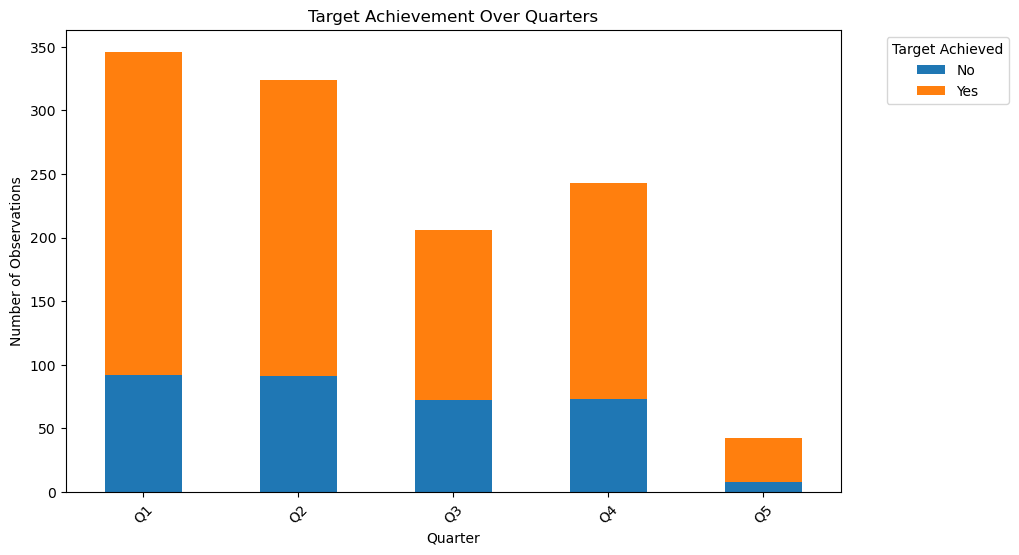

In [16]:
grouped_data = funnel.groupby(['Quarter', 'Target Achieved']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Observations')
ax.set_title('Target Achievement Over Quarters')

ax.legend(title='Target Achieved', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()


# The bar graph visually represents the level of target achievement (Yes/ No) across different quarters. It hilights fluctuations in productivity trends over time. 
# We can clearly see that highest yes count is in Quarter1 followed by Quarter2 and Quarter4 which indicates the better performance.
# This graph provide a concise overview of productivity trends over quarters.

In [17]:
funnel.columns

Index(['Date', 'Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity', 'Target Achieved'],
      dtype='object')

c:\Users\Narendra Singh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Narendra Singh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Narendra Singh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Narendra Singh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

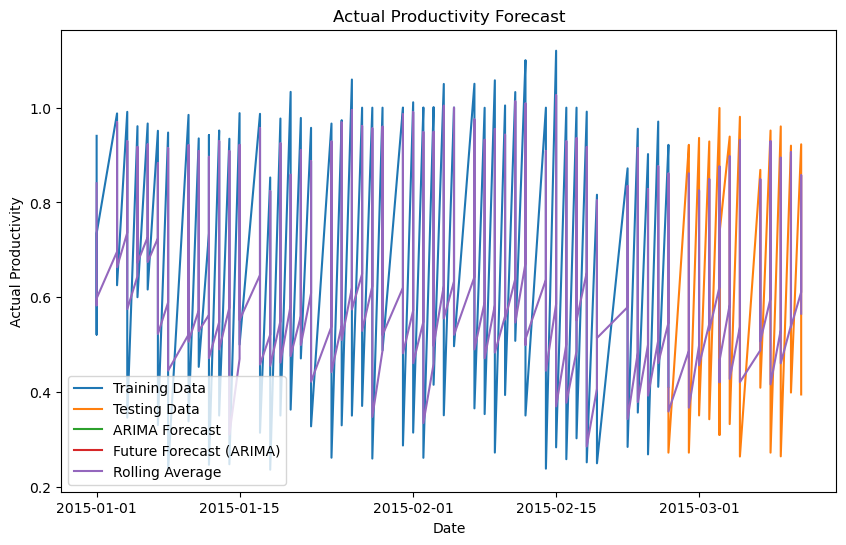


Rolling Average:
Date
2015-01-01         NaN
2015-01-01         NaN
2015-01-01         NaN
2015-01-01    0.840669
2015-01-01    0.805519
                ...   
2015-03-11    0.669920
2015-03-11    0.678515
2015-03-11    0.659859
2015-03-11    0.623682
2015-03-11    0.565279
Name: Actual Productivity, Length: 1161, dtype: float64


ARIMA Forecast:
928     0.448651
929     0.465997
930     0.473544
931     0.472432
932     0.468096
          ...   
1156    0.464257
1157    0.464257
1158    0.464257
1159    0.464257
1160    0.464257
Name: predicted_mean, Length: 233, dtype: float64


In [18]:
from statsmodels.tsa.arima.model import ARIMA

funnel.reset_index(inplace=True)
funnel['Date'] = pd.to_datetime(funnel['Date'])

funnel.set_index('Date', inplace=True)

train_size = int(len(funnel) * 0.8)
train_data, test_data = funnel.iloc[:train_size], funnel.iloc[train_size:]

model = ARIMA(train_data['Actual Productivity'], order=(5,1,0))
arima_model = model.fit()

predictions = arima_model.forecast(steps=len(test_data))
test_data['ARIMA Forecast'] = predictions

future_steps = 4
forecast_dates = pd.date_range(start=funnel.index[-1], periods=future_steps+1, freq='Q').tolist()[1:]
future_forecast = arima_model.forecast(steps=future_steps)
future_forecast_series = pd.Series(future_forecast, index=forecast_dates)

rolling_avg = funnel['Actual Productivity'].rolling(window=4).mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Actual Productivity'], label='Training Data')
plt.plot(test_data.index, test_data['Actual Productivity'], label='Testing Data')
plt.plot(test_data.index, test_data['ARIMA Forecast'], label='ARIMA Forecast')
plt.plot(future_forecast_series.index, future_forecast_series, label='Future Forecast (ARIMA)')
plt.plot(funnel.index, rolling_avg, label='Rolling Average')
plt.title('Actual Productivity Forecast')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()

print("\nRolling Average:")
print(rolling_avg)

print("\n\nARIMA Forecast:")
print(predictions)


In [19]:
funnel.isnull().sum()

index                    0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
Target Achieved          0
dtype: int64

In [20]:
# Create 'Target Achieved' column
funnel['Target Achieved'] = np.where(funnel['Actual Productivity'] > funnel['Targeted Productivity'], 'Yes', 'No')


In [21]:
funnel.isnull().sum()

index                    0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
Target Achieved          0
dtype: int64

In [22]:
duplicates = funnel.duplicated()

num_duplicates = duplicates.sum()

funnel.drop_duplicates(inplace=True)

print("Number of duplicates removed:", num_duplicates)


Number of duplicates removed: 0


In [23]:
funnel

,index,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
Date,,,,,,,,
2015-01-01,0,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
2015-01-01,1,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2015-01-01,2,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
2015-01-01,4,Q1,Sewing,0.80,1920,56.0,0.734882,No
2015-01-01,5,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...,...
2015-03-11,1192,Q2,Finishing,0.75,960,8.0,0.628333,No
2015-03-11,1193,Q2,Finishing,0.70,960,8.0,0.734882,Yes
2015-03-11,1194,Q2,Finishing,0.65,960,8.0,0.625625,No


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = funnel[['Quarter', 'Department', 'Targeted Productivity', 'Overtime', 'No. of Workers']]
y = funnel['Actual Productivity']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.023498261124917662


In [25]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = np.array([10, 20, 30, 40, 50])
y_pred = np.array([12, 18, 33, 45, 48])

mape = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 11.300000000000002


In [26]:
department_quarterly_spend = 8.4 * 10**5 / 2  # Rs. 8.4 lakh per quarter, divided equally among departments

funnel['Department Value'] = funnel['Actual Productivity'] / department_quarterly_spend

funnel['Department Value'] = (funnel['Department Value'] - funnel['Department Value'].min()) / (funnel['Department Value'].max() - funnel['Department Value'].min())

print(funnel[['Quarter', 'Department', 'Department Value']])


           Quarter Department  Department Value
Date                                           
2015-01-01      Q1     Sewing          0.797332
2015-01-01      Q1  Finishing          0.736180
2015-01-01      Q1     Sewing          0.639274
2015-01-01      Q1     Sewing          0.565195
2015-01-01      Q1     Sewing          0.638772
...            ...        ...               ...
2015-03-11      Q2  Finishing          0.445036
2015-03-11      Q2  Finishing          0.565195
2015-03-11      Q2  Finishing          0.441982
2015-03-11      Q2  Finishing          0.306951
2015-03-11      Q2  Finishing          0.181584

[1161 rows x 3 columns]


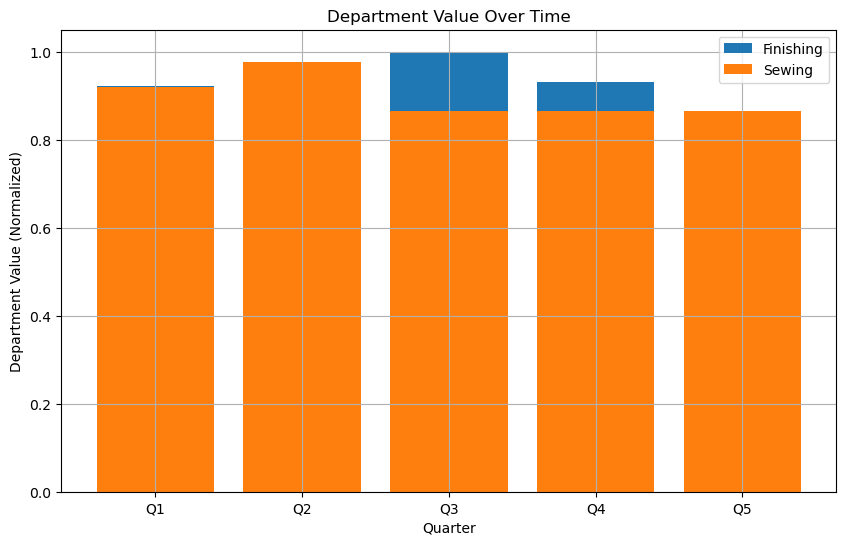

In [27]:
department_quarterly_spend = 8.4 * 10**5 / 2  # Rs. 8.4 lakh per quarter, divided equally among departments

funnel['Department Value'] = funnel['Actual Productivity'] / department_quarterly_spend

funnel['Department Value'] = (funnel['Department Value'] - funnel['Department Value'].min()) / (funnel['Department Value'].max() - funnel['Department Value'].min())

plt.figure(figsize=(10, 6))
for department, data in funnel.groupby('Department'):
    plt.bar(data['Quarter'], data['Department Value'], label=department)

plt.title('Department Value Over Time')
plt.xlabel('Quarter')
plt.ylabel('Department Value (Normalized)')
plt.legend()
plt.grid(True)
plt.show()


# The allocation strategy should aim to optimize resource utilization by allocating more resources to departments with higher performance potential while providing support and opportunities for improvement to underperforming departments.
# This balanced approach helps drive overall organizational growth and success.

In [28]:
AB_Testing = pd.read_excel(r"C:\Users\Narendra Singh\Downloads\Fittlyf Assignment\AB_Testing.xlsx")
AB_Testing

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control
...,...,...,...,...,...,...
18094,2023-05-17,Tablet,fyttlyf/personal/campaign/weekoneoffer-terms///,12,13,Control
18095,2023-05-17,Mobile,fyttlyf/personal//send-money-to-india///,4,15,Experiment
18096,2023-05-17,Laptop,fyttlyf/personal/buy/fyttlyf-benefits///,12,42,Control
18097,2023-05-17,Tablet,fyttlyf/enterprise/product/enterprise-pay-late...,15,13,Control


In [29]:
AB_Testing.columns

Index(['Date', 'Device', 'Address', 'Clicks', 'Visitors', 'Group'], dtype='object')

In [30]:
AB_Testing.isnull().sum() 

Date        0
Device      0
Address     0
Clicks      0
Visitors    0
Group       0
dtype: int64

In [31]:
duplicates = AB_Testing.duplicated()
print("Number of duplicate rows:-", duplicates.sum())


Number of duplicate rows:- 0


In [32]:
AB_Testing.shape

(18099, 6)

In [33]:
AB_Testing.head()

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control


In [34]:
AB_Testing.describe()

,Clicks,Visitors
count,18099.000000,18099.000000
mean,62.600033,495.485441
std,377.536611,5704.920360
min,0.000000,0.000000
25%,6.000000,21.000000
50%,11.000000,33.000000
75%,20.000000,97.000000
max,11199.000000,211868.000000


In [35]:
AB_Testing.dtypes

Date        datetime64[ns]
Device              object
Address             object
Clicks               int64
Visitors             int64
Group               object
dtype: object

In [36]:
print("\nUnique values in categorical columns:")
for col in AB_Testing.select_dtypes(include=['object']).columns:
    print(col, ":", AB_Testing[col].unique())



Unique values in categorical columns:
Device : ['Mobile' 'Laptop' 'Other' 'Tablet']
Address : ['fyttlyf/business/campaign/campaigns-business/contact///'
 'fyttlyf/business/campaign/get-paid///'
 'fyttlyf/business/campaign/campaigns-business/sign-up///'
 'fyttlyf/business/product/business-financial-services/credit-card///'
 'fyttlyf/business/product/business-accept-payments///'
 'fyttlyf/personal/product/digital-wallet-send-receive-money///'
 'fyttlyf/business/product/business///'
 'fyttlyf/both/security/security-learn-about-fake-messages///'
 'fyttlyf///extras-credit-card-benefits///'
 'fyttlyf/business/product/business-pos-system/pricing///'
 'fyttlyf///spotify-premium-offer///'
 'fyttlyf/personal//fyttlyf-credit-signin///'
 'fyttlyf/personal/product/digital-wallet///'
 'fyttlyf/personal/sem/pay-with-rewards-capitalone///'
 'fyttlyf/personal/campaign/campaigns-digital-wallet/ways-to-pay/affiliate///'
 'fyttlyf/general/product/accessibility///'
 'fyttlyf/both/security/security-learn-a

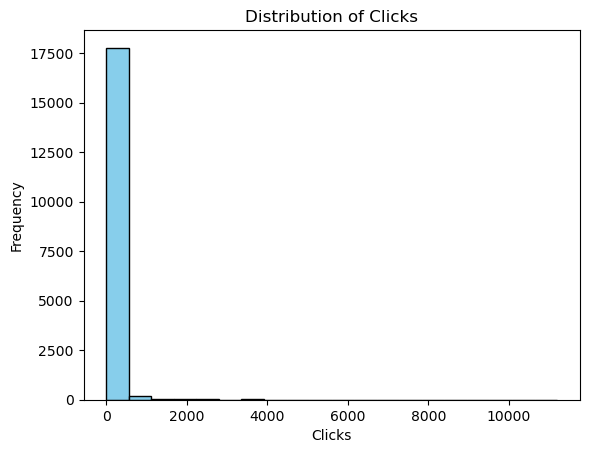

In [37]:
plt.hist(AB_Testing['Clicks'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()


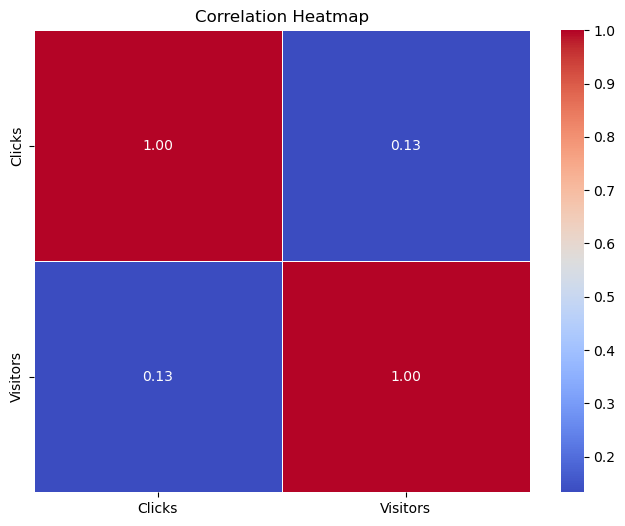

In [38]:
correlation_matrix = AB_Testing[['Clicks', 'Visitors']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [39]:
correlation_matrix = AB_Testing.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
            Clicks  Visitors
Clicks    1.000000  0.132942
Visitors  0.132942  1.000000


C:\Users\Narendra Singh\AppData\Local\Temp\ipykernel_152724\3776138170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = AB_Testing.corr()


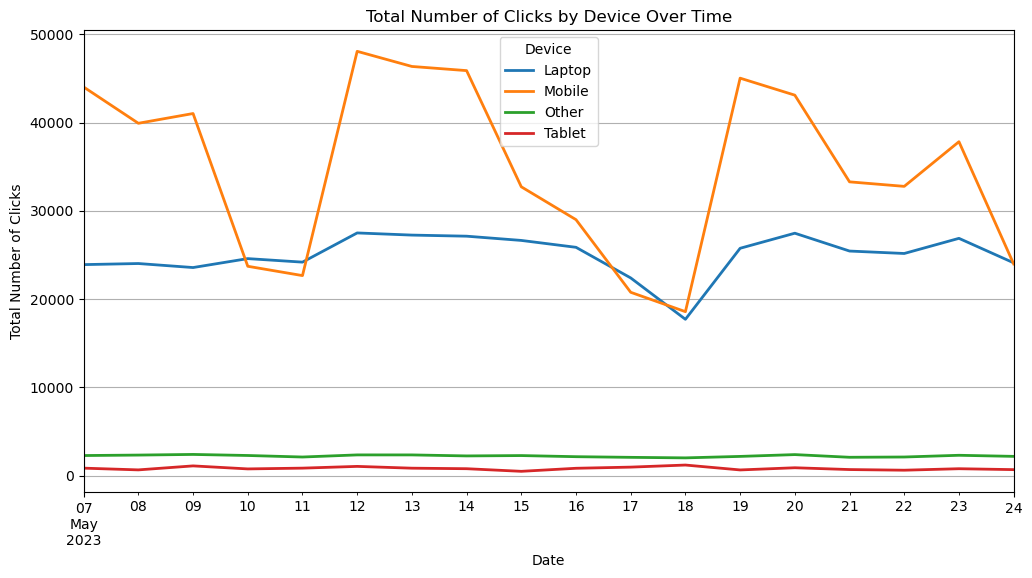

In [40]:
import matplotlib.pyplot as plt

# Group the data by Date and Device, and sum the Clicks for each group
device_clicks = AB_Testing.groupby(['Date', 'Device'])['Clicks'].sum().reset_index()

# Pivot the dataframe to have Date as index, Device as columns, and Clicks as values
device_clicks_pivot = device_clicks.pivot(index='Date', columns='Device', values='Clicks')

# Plot the time series for each device type
device_clicks_pivot.plot(figsize=(12, 6), linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Number of Clicks')
plt.title('Total Number of Clicks by Device Over Time')

# Show legend
plt.legend(title='Device')

# Show plot
plt.grid(True)
plt.show()


# Assuming MDE = 3%, α = 95% and statistical power (1-β) = 80%
# Using this link I have calculated the sample size -> https://www.evanmiller.org/ab-testing/sample-size.html
# After calculation, the sample size is 408, which is sufficient sample size to conclude the test.

In [41]:
import scipy.stats as stats

def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    control_rate = control_conversions / control_visitors
    treatment_rate = treatment_conversions / treatment_visitors
    z_score = (treatment_rate - control_rate) / np.sqrt((control_rate * (1 - control_rate)) / control_visitors)
    alpha = 1 - (confidence_level / 100)
    z_critical = stats.norm.ppf(1 - alpha / 2)
    
    if z_score > z_critical:
        return "Experiment Group is Better"
    elif z_score < -z_critical:
        return "Control Group is Better"
    else:
        return "Indeterminate"

control_visitors = 5000
control_conversions = 400
treatment_visitors = 5000
treatment_conversions = 420
confidence_level = 95

result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print("Result of A/B Test:", result)


Result of A/B Test: Indeterminate


In [42]:
! pip install streamlit


In [43]:
import numpy as np
import scipy.stats as stats

def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    if control_visitors == 0 or treatment_visitors == 0:
        return "Error: Number of visitors cannot be zero"
    
    control_rate = control_conversions / control_visitors
    treatment_rate = treatment_conversions / treatment_visitors
    z_score = (treatment_rate - control_rate) / np.sqrt((control_rate * (1 - control_rate)) / control_visitors)
    alpha = 1 - (confidence_level / 100)
    z_critical = stats.norm.ppf(1 - alpha / 2)
    
    if z_score > z_critical:
        return "Experiment Group is Better"
    elif z_score < -z_critical:
        return "Control Group is Better"
    else:
        return "Indeterminate"


In [44]:
import streamlit as st

def main():
    st.title("A/B Test Hypothesis Testing App")
    st.sidebar.header("Input Parameters")
    
    control_visitors = st.sidebar.number_input("Control Group Visitors", min_value=0, step=1)
    control_conversions = st.sidebar.number_input("Control Group Conversions", min_value=0, step=1)
    treatment_visitors = st.sidebar.number_input("Treatment Group Visitors", min_value=0, step=1)
    treatment_conversions = st.sidebar.number_input("Treatment Group Conversions", min_value=0, step=1)
    confidence_level = st.sidebar.selectbox("Confidence Level", [90, 95, 99])
    
    if st.sidebar.button("Run Test"):
        result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
        st.write(f"Result: {result}")

if __name__ == "__main__":
    main()


2024-03-22 13:19:44.451 
  command:

    streamlit run c:\Users\Narendra Singh\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
